In [21]:
import os
import sys

# Scientific computation
import numpy as np
import scipy as sp
import pandas as pd

import xgboost as xgb
import lightgbm as lgb
import konlpy

# Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
pd.plotting.register_matplotlib_converters()
import folium

# Font detection
import matplotlib.font_manager as fm
from fontTools.ttLib import TTFont
fm._rebuild()

# Eye candy
#!pip install tqdm
from tqdm import tqdm

In [22]:
print(sys.version)
for m in [np, sp, pd, xgb, lgb, konlpy, mpl, folium]:
    print(f'{m.__name__}: {m.__version__}')

#print(f"Current Environment: {os.environ['CONDA_DEFAULT_ENV']}")
#assert os.environ['CONDA_DEFAULT_ENV'] == 'nims-academy-2019-08'

3.6.5 (default, Jun 22 2018, 15:12:50) 
[GCC 5.4.0 20160609]
numpy: 1.17.0
scipy: 1.3.1
pandas: 0.22.0
xgboost: 0.90
lightgbm: 2.2.1
konlpy: 0.5.1
matplotlib: 3.1.1
folium: 0.10.0


In [15]:

def is_char_in_font(c, font):
    for cmap in TTFont(font.fname, fontNumber=0)['cmap'].tables:
        try:
            if cmap.isUnicode() and ord(c) in cmap.cmap:
                return True
        except:  # Temporary
            print(f'Error raised: {c}, {font}')
    return False

valid_font_set = set()
for font in tqdm(fm.fontManager.ttflist):
    if (is_char_in_font('한', font) 
            and is_char_in_font('a', font)
            and is_char_in_font('0', font)
           ):
        valid_font_set.add(font.name)
print(valid_font_set)


100%|██████████| 240/240 [00:06<00:00, 39.20it/s]

{'NanumMyeongjo', 'UnBatang', 'UnGraphic', 'NanumBarunGothic', 'NanumGothicCoding', 'UnDinaru', 'Noto Sans CJK JP', 'UnGungseo', 'UnPilgi', 'UnDotum', 'NanumGothic'}


In [16]:
print(type(valid_font_set))

<class 'set'>


idx : 0, fontname : NanumMyeongjo
idx : 1, fontname : UnBatang
idx : 2, fontname : UnGraphic
idx : 3, fontname : NanumBarunGothic
idx : 4, fontname : NanumGothicCoding
idx : 5, fontname : UnDinaru
idx : 6, fontname : Noto Sans CJK JP
idx : 7, fontname : UnGungseo
idx : 8, fontname : UnPilgi
idx : 9, fontname : UnDotum
idx : 10, fontname : NanumGothic


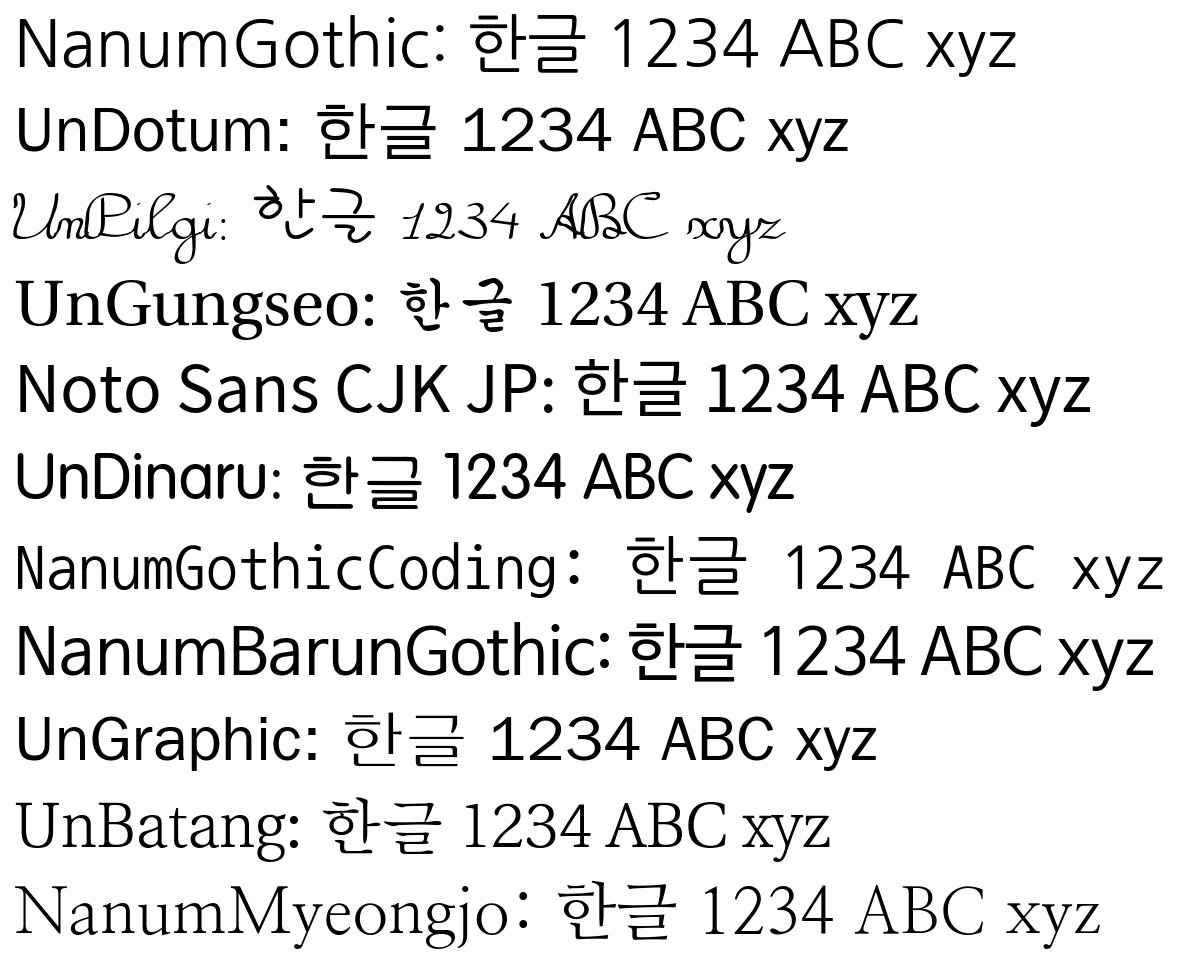

In [23]:

fig, ax = plt.subplots()
for i, fontname in enumerate(valid_font_set):
    print('idx : {}, fontname : {}'.format(i, fontname))
    ax.axis('off')
    ax.text(
        0, i / 5, f'{fontname}: 한글 1234 ABC xyz',
        fontname=fontname,
        fontsize=32,
    )

Text(0.5, 0.3, '결과 : $\\int_0^{\\infty}\\frac{1}{x^2}$')

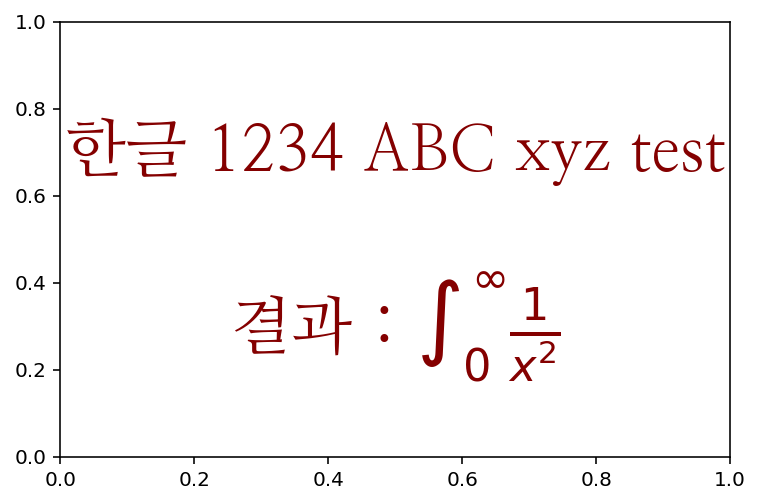

In [28]:
mpl.rc('font', family='Malgun Gothic')
#                      ^^^^^^^^^^^^^ Change here

fig, ax = plt.subplots()
ax.text(
    0.5, 0.7, '한글 1234 ABC xyz test',
    fontname = 'NanumMyeongjo',
    fontsize='32',
    horizontalalignment='center',
    verticalalignment='center',
    color='xkcd:dark red',
)
ax.text(
    0.5, 0.3, r'결과 : $\int_0^{\infty}\frac{1}{x^2}$',
    fontname = 'NanumMyeongjo',
    fontsize='32',
    horizontalalignment='center',
    verticalalignment='center',
    color='xkcd:dark red',
)

           x         y         c         s
0   0.374540  0.950714  0.731994  0.598658
1   0.156019  0.155995  0.058084  0.866176
2   0.601115  0.708073  0.020584  0.969910
3   0.832443  0.212339  0.181825  0.183405
4   0.304242  0.524756  0.431945  0.291229
5   0.611853  0.139494  0.292145  0.366362
6   0.456070  0.785176  0.199674  0.514234
7   0.592415  0.046450  0.607545  0.170524
8   0.065052  0.948886  0.965632  0.808397
9   0.304614  0.097672  0.684233  0.440152
10  0.122038  0.495177  0.034389  0.909320
11  0.258780  0.662522  0.311711  0.520068
12  0.546710  0.184854  0.969585  0.775133
13  0.939499  0.894827  0.597900  0.921874
14  0.088493  0.195983  0.045227  0.325330
15  0.388677  0.271349  0.828738  0.356753
16  0.280935  0.542696  0.140924  0.802197
17  0.074551  0.986887  0.772245  0.198716
18  0.005522  0.815461  0.706857  0.729007
19  0.771270  0.074045  0.358466  0.115869
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 colum

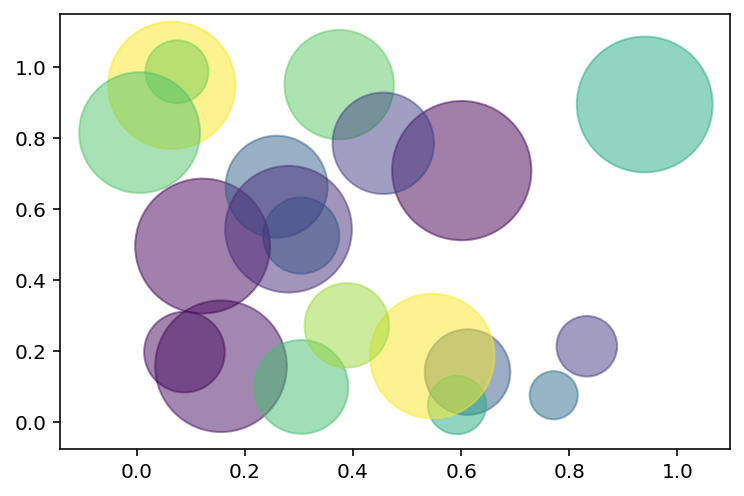

In [31]:
rng = np.random.RandomState(42)
df = pd.DataFrame(rng.uniform(size=(20, 4)), columns=list('xycs'))
fig, ax = plt.subplots()
ax.scatter(df['x'], df['y'], c=df['c'], s=(5000 * df['s']), alpha=0.5)
print(df)
print(df.info())

In [11]:

import folium 
folium.Map(location=(37.5006953, 127.4212938), zoom_start=18)

In [12]:
from konlpy.tag import Kkma
kkma = Kkma()
print(kkma.sentences("네, 안녕하세요. 반갑습니다."))
print(kkma.nouns("국가수리과학연구소는 수학적 접근을 통해 기업이 직면한 문제를 함께 해결하고 있습니다."))
print(kkma.pos("국가수리과학연구소는 수학적 접근을 통해 기업이 직면한 문제를 함께 해결하고 있습니다."))

['네, 안녕하세요.', '반갑습니다.']
['국가', '국가수리과학연구소', '수리', '과학', '연구소', '수학적', '접근', '기업', '직면', '문제', '해결']
[('국가', 'NNG'), ('수리', 'NNG'), ('과학', 'NNG'), ('연구소', 'NNG'), ('는', 'JX'), ('수학적', 'NNG'), ('접근', 'NNG'), ('을', 'JKO'), ('통하', 'VV'), ('어', 'ECS'), ('기업', 'NNG'), ('이', 'JKS'), ('직면', 'NNG'), ('하', 'XSV'), ('ㄴ', 'ETD'), ('문제', 'NNG'), ('를', 'JKO'), ('함께', 'MAG'), ('해결', 'NNG'), ('하', 'XSV'), ('고', 'ECE'), ('있', 'VXV'), ('습니다', 'EFN'), ('.', 'SF')]


## Additional  
- http://kkma.snu.ac.kr/documents/index.jsp?doc=postag ,kkma documentation for kkma.pos (tag information)